In [ ]:
!conda install -c conda-forge geopy --yes

In [ ]:
pip install geocoder

In [145]:
import pandas as pd
import numpy as np
from geopy import geocoders
from geopy.geocoders import Nominatim
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import geocoder 
print('libararies imported!')

libararies imported!


In [161]:
import geocoder 
g = geocoder.arcgis('0')
print(g.latlng)
print(type(g.latlng))

[55.586200000000076, 38.50100000000003]
<class 'list'>


In [162]:
nyc_subset=pd.read_csv('nyc_subset.csv')
nyc_subset.drop('Unnamed: 0', axis=1, inplace=True)
nyc_subset.head(3)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


BOROUGH   NEIGHBORHOOD  ZIP CODE BUILDING CLASS CATEGORY CODE  \
0  Manhattan  ALPHABET CITY     10009                           07   
1  Manhattan  ALPHABET CITY     10009                           07   
2  Manhattan  ALPHABET CITY     10009                           07   

               BUILDING CLASS CATEGORY NAME  TOTAL UNITS  LAND SQUARE FEET  \
0  RENTALS - WALKUP APARTMENTS                         5            1633.0   
1  RENTALS - WALKUP APARTMENTS                        10            2272.0   
2  RENTALS - WALKUP APARTMENTS                         6            2369.0   

   GROSS SQUARE FEET  YEAR BUILT  SALE PRICE  PRICE PER GROSS SQFT  \
0             6440.0        1900   6625000.0                1029.0   
1             6794.0        1913   3936272.0                 579.0   
2             4615.0        1900   8000000.0                1733.0   

   PRICE PER LAND SQFT  PRICE PER UNIT  
0               4057.0      1325000.00  
1               1733.0       393627.20  
2               3377.0      1333333.33

In [163]:
nyc_subset.shape

(69987, 13)

In [164]:
# drop rows with 0 sale prices.
nyc_subset=nyc_subset[nyc_subset['SALE PRICE'] != 0]
nyc_subset.shape

(59759, 13)

In [165]:
# Get names of indexes for which column ZIP CODE has value 0.
indexNames=nyc_subset[nyc_subset['ZIP CODE'] == 0].index
#print(indexNames)

#Delete these row indexes from dataFrame.
nyc_subset.drop(indexNames , inplace=True)
nyc_subset.shape

(59103, 13)

#### Let's group the *nyc_subset* dataframe by borough, neighborhood, building class, and then get the mean sale prices.

In [166]:
nyc_grouped=nyc_subset.groupby(['BOROUGH', 'NEIGHBORHOOD','ZIP CODE', 'BUILDING CLASS CATEGORY NAME']).agg({'SALE PRICE':['mean', 'max', 'min'], 'PRICE PER UNIT':['mean'], 'PRICE PER GROSS SQFT': ['mean'], 'PRICE PER LAND SQFT': ['mean']})
nyc_grouped.columns=['SALE PRICE MEAN', 'SALE PRICE MAX', 'SALE PRICE MIN', 'PRICE/UNIT MEAN', 'PRICE/GROSS SQFT MEAN', 'PRICE/LAND SQFT MEAN']
nyc_grouped=nyc_grouped.reset_index()
print(nyc_grouped.shape)
nyc_grouped.head(20)

(4295, 10)


BOROUGH NEIGHBORHOOD  ZIP CODE              BUILDING CLASS CATEGORY NAME  \
0    Bronx     BATHGATE     10451  RENTALS - WALKUP APARTMENTS                
1    Bronx     BATHGATE     10456  RELIGIOUS FACILITIES                       
2    Bronx     BATHGATE     10457  COMMERCIAL GARAGES                         
3    Bronx     BATHGATE     10457  COOPS - ELEVATOR APARTMENTS                
4    Bronx     BATHGATE     10457  FACTORIES                                  
5    Bronx     BATHGATE     10457  ONE FAMILY DWELLINGS                       
6    Bronx     BATHGATE     10457  RENTALS - WALKUP APARTMENTS                
7    Bronx     BATHGATE     10457  TAX CLASS 4 - OTHER                        
8    Bronx     BATHGATE     10457  THREE FAMILY DWELLINGS                     
9    Bronx     BATHGATE     10457  TWO FAMILY DWELLINGS                       
10   Bronx     BATHGATE     10457  WAREHOUSES                                 
11   Bronx     BATHGATE     10458  RENTALS - WALKUP APARTMENTS                
12   Bronx     BATHGATE     10458  THREE FAMILY DWELLINGS                     
13   Bronx     BATHGATE     10458  TWO FAMILY DWELLINGS                       
14   Bronx     BATHGATE     10458  WAREHOUSES                                 
15   Bronx   BAYCHESTER     10466  COMMERCIAL GARAGES                         
16   Bronx   BAYCHESTER     10466  FACTORIES                                  
17   Bronx   BAYCHESTER     10466  ONE FAMILY DWELLINGS                       
18   Bronx   BAYCHESTER     10466  RENTALS - WALKUP APARTMENTS                
19   Bronx   BAYCHESTER     10466  STORE BUILDINGS                            

    SALE PRICE MEAN  SALE PRICE MAX  SALE PRICE MIN  PRICE/UNIT MEAN  \
0      4.461000e+06       4461000.0       4461000.0     1.715769e+05   
1      4.000000e+05        400000.0        400000.0     4.000000e+05   
2      2.100000e+06       2500000.0       1700000.0     1.675000e+06   
3      4.666667e+04         60000.0         40000.0     4.666667e+04   
4      1.725000e+06       3000000.0        375000.0     1.725000e+06   
5      2.470067e+05        420000.0        127000.0     2.470067e+05   
6      1.086667e+06       1980000.0        400000.0     1.260073e+05   
7      3.000000e+05        300000.0        300000.0     3.000000e+05   
8      4.826798e+05        689399.0        299000.0     1.608933e+05   
9      3.898750e+05        700000.0        200000.0     1.720208e+05   
10     1.900000e+06       1900000.0       1900000.0     1.900000e+06   
11     2.414000e+06       4052000.0       1315000.0     1.568997e+05   
12     4.330325e+05        545000.0        321065.0     1.443442e+05   
13     3.981083e+05        875025.0         18000.0     1.990542e+05   
14     8.000000e+05        800000.0        800000.0     8.000000e+05   
15     1.475000e+06       3000000.0        500000.0     1.175000e+06   
16     2.250000e+06       2250000.0       2250000.0     2.250000e+06   
17     3.257530e+05        499900.0          1000.0     3.257530e+05   
18     2.100000e+05        210000.0        210000.0     5.250000e+04   
19     7.002500e+05       2500000.0          1000.0     7.002500e+05   

    PRICE/GROSS SQFT MEAN  PRICE/LAND SQFT MEAN  
0              244.000000           1323.000000  
1               57.000000            160.000000  
2                     inf            573.500000  
3                     inf                   inf  
4              153.666667            254.000000  
5              169.666667            119.333333  
6              155.000000            327.000000  
7                     inf             97.000000  
8              173.400000            324.400000  
9              164.750000            199.750000  
10             318.000000            217.000000  
11             174.333333            606.666667  
12             238.000000            250.000000  
13             188.000000            304.500000  
14             161.000000            146.000000  
15             136.500000     

In [167]:
nyc_subset.dtypes

BOROUGH                          object
NEIGHBORHOOD                     object
ZIP CODE                          int64
BUILDING CLASS CATEGORY CODE     object
BUILDING CLASS CATEGORY NAME     object
TOTAL UNITS                       int64
LAND SQUARE FEET                float64
GROSS SQUARE FEET               float64
YEAR BUILT                        int64
SALE PRICE                      float64
PRICE PER GROSS SQFT            float64
PRICE PER LAND SQFT             float64
PRICE PER UNIT                  float64
dtype: object

Create a list contains unique names of all the zip code in the dataset and name it *zipcode*. 

In [168]:
zipcode=nyc_grouped['ZIP CODE'].unique().tolist()
zipcode[0:10]

[10451, 10456, 10457, 10458, 10466, 10469, 10475, 10467, 10468, 10460]

#### Let's get the latitude and longitude for all the unique zipcode in New York City. And put the lat and lng to lat_lng_coords. 

In [169]:
lat_lng_coords=[]
for pcode in zipcode:
    g=geocoder.arcgis('{}, New York City, US'.format(pcode))
    lat_lng_coords.append(g.latlng)

In [170]:
type(lat_lng_coords)
lat_lng_coords[0:10]

[[40.81998637165564, -73.91843347823529],
 [40.833954885716096, -73.89668519915384],
 [40.84811103934723, -73.90381311322106],
 [40.86205887610246, -73.88757457267809],
 [40.88785662279304, -73.82794306634165],
 [40.86202206431831, -73.84190437932382],
 [40.860091403904676, -73.82886574743712],
 [40.85684025777411, -73.86503492762066],
 [40.86552039251163, -73.90350067668386],
 [40.83568097539611, -73.8864265464645]]

In [171]:
# Convert zipcode and lat_lng_coords lists to one dictionary.

# Create a zip object from two lists
zipobject=zip(zipcode, lat_lng_coords)

#create a dictionary from zip object
pcode_dict=dict(zipobject)
pcode_dict[10451][0]

40.81998637165564

In [172]:
#nyc_grouped.drop('LATITUDE', axis=1, inplace=True)
#nyc_grouped.drop('LONGITUDE', axis=1, inplace=True)
nyc_grouped.insert(4, 'LATITUDE', ' ', allow_duplicates = False)
nyc_grouped.insert(4, 'LONGITUDE', ' ', allow_duplicates = False)

In [173]:
nyc_grouped.head(3)

BOROUGH NEIGHBORHOOD  ZIP CODE              BUILDING CLASS CATEGORY NAME  \
0   Bronx     BATHGATE     10451  RENTALS - WALKUP APARTMENTS                
1   Bronx     BATHGATE     10456  RELIGIOUS FACILITIES                       
2   Bronx     BATHGATE     10457  COMMERCIAL GARAGES                         

  LONGITUDE LATITUDE  SALE PRICE MEAN  SALE PRICE MAX  SALE PRICE MIN  \
0                           4461000.0       4461000.0       4461000.0   
1                            400000.0        400000.0        400000.0   
2                           2100000.0       2500000.0       1700000.0   

   PRICE/UNIT MEAN  PRICE/GROSS SQFT MEAN  PRICE/LAND SQFT MEAN  
0        171576.92                  244.0                1323.0  
1        400000.00                   57.0                 160.0  
2       1675000.00                    inf                 573.5

In [174]:
nyc_grouped['LATITUDE']=nyc_grouped['ZIP CODE'].apply(lambda x: pcode_dict.get(x)[0])
nyc_grouped['LONGITUDE']=nyc_grouped['ZIP CODE'].apply(lambda x: pcode_dict.get(x)[1])
nyc_grouped.head(3)

BOROUGH NEIGHBORHOOD  ZIP CODE              BUILDING CLASS CATEGORY NAME  \
0   Bronx     BATHGATE     10451  RENTALS - WALKUP APARTMENTS                
1   Bronx     BATHGATE     10456  RELIGIOUS FACILITIES                       
2   Bronx     BATHGATE     10457  COMMERCIAL GARAGES                         

   LONGITUDE   LATITUDE  SALE PRICE MEAN  SALE PRICE MAX  SALE PRICE MIN  \
0 -73.918433  40.819986        4461000.0       4461000.0       4461000.0   
1 -73.896685  40.833955         400000.0        400000.0        400000.0   
2 -73.903813  40.848111        2100000.0       2500000.0       1700000.0   

   PRICE/UNIT MEAN  PRICE/GROSS SQFT MEAN  PRICE/LAND SQFT MEAN  
0        171576.92                  244.0                1323.0  
1        400000.00                   57.0                 160.0  
2       1675000.00                    inf                 573.5

In [175]:
nyc_grouped.shape

(4295, 12)

In [ ]:
nyc_grouped.to_csv('nyc_grouped.csv')

#### Let's delete all rows whose "ZIP CODE" value is 0. 

In [176]:
# Get names of indexes for which column ZIP CODE has value 0.
indexNames=nyc_grouped[nyc_grouped['ZIP CODE'] == 0].index
#print(indexNames)

#Delete these row indexes from dataFrame.
nyc_grouped.drop(indexNames , inplace=True)
nyc_grouped.shape

(4295, 12)

In [177]:
nyc_grouped.head(10)

BOROUGH NEIGHBORHOOD  ZIP CODE              BUILDING CLASS CATEGORY NAME  \
0   Bronx     BATHGATE     10451  RENTALS - WALKUP APARTMENTS                
1   Bronx     BATHGATE     10456  RELIGIOUS FACILITIES                       
2   Bronx     BATHGATE     10457  COMMERCIAL GARAGES                         
3   Bronx     BATHGATE     10457  COOPS - ELEVATOR APARTMENTS                
4   Bronx     BATHGATE     10457  FACTORIES                                  
5   Bronx     BATHGATE     10457  ONE FAMILY DWELLINGS                       
6   Bronx     BATHGATE     10457  RENTALS - WALKUP APARTMENTS                
7   Bronx     BATHGATE     10457  TAX CLASS 4 - OTHER                        
8   Bronx     BATHGATE     10457  THREE FAMILY DWELLINGS                     
9   Bronx     BATHGATE     10457  TWO FAMILY DWELLINGS                       

   LONGITUDE   LATITUDE  SALE PRICE MEAN  SALE PRICE MAX  SALE PRICE MIN  \
0 -73.918433  40.819986     4.461000e+06       4461000.0       4461000.0   
1 -73.896685  40.833955     4.000000e+05        400000.0        400000.0   
2 -73.903813  40.848111     2.100000e+06       2500000.0       1700000.0   
3 -73.903813  40.848111     4.666667e+04         60000.0         40000.0   
4 -73.903813  40.848111     1.725000e+06       3000000.0        375000.0   
5 -73.903813  40.848111     2.470067e+05        420000.0        127000.0   
6 -73.903813  40.848111     1.086667e+06       1980000.0        400000.0   
7 -73.903813  40.848111     3.000000e+05        300000.0        300000.0   
8 -73.903813  40.848111     4.826798e+05        689399.0        299000.0   
9 -73.903813  40.848111     3.898750e+05        700000.0        200000.0   

   PRICE/UNIT MEAN  PRICE/GROSS SQFT MEAN  PRICE/LAND SQFT MEAN  
0     1.715769e+05             244.000000           1323.000000  
1     4.000000e+05              57.000000            160.000000  
2     1.675000e+06                    inf            573.500000  
3     4.666667e+04                    inf                   inf  
4     1.725000e+06             153.666667            254.000000  
5     2.470067e+05             169.666667            119.333333  
6     1.260073e+05             155.000000            327.000000  
7     3.000000e+05                    inf             97.000000  
8     1.608933e+05             173.400000            324.400000  
9     1.720208e+05             164.750000            199.750000

In [178]:
nyc_grouped.to_csv('nyc_grouped_nozeroZipCode.csv')

In [179]:
nyc_grouped['ZIP CODE'].unique()

array([10451, 10456, 10457, 10458, 10466, 10469, 10475, 10467, 10468,
       10460, 10472, 10473, 10462, 10464, 10803, 10465, 10471, 10453,
       10452, 10455, 10474, 10463, 10461, 10459, 10454, 10470, 11214,
       11228, 11209, 11219, 11220, 11205, 11206, 11213, 11216, 11221,
       11233, 11238, 11204, 11234, 11201, 11217, 11218, 11230, 11232,
       11235, 11212, 11207, 11237, 11236, 11239, 11231, 11249, 11224,
       11225, 11208, 11210, 11226, 11203, 11229, 11215, 11223, 11211,
       11222, 10002, 10009, 10001, 10010, 10011, 10014, 10013, 10038,
       10007, 10018, 10019, 10036, 10003, 10004, 10005, 10006, 10016,
       10012, 10026, 10027, 10030, 10031, 10032, 10035, 10037, 10039,
       10029, 10128, 10034, 10025, 10017, 10022, 10167, 10023, 10105,
       10044, 10280, 10282, 10021, 10065, 10075, 10028, 10024, 10069,
       10033, 10040, 11370, 11691, 11692, 11101, 11102, 11103, 11105,
       11106, 11377, 11357, 11358, 11360, 11361, 11364, 11694, 11001,
       11004, 11426,

In [180]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
len(nyc_grouped['BOROUGH'].unique()),
len(nyc_grouped['NEIGHBORHOOD'].unique())))

The dataframe has 5 boroughs and 253 neighborhoods.


### Explore and cluster the neighborhoods in NYC.

In [181]:
import json  # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans  # import k-means from clustering stage
import folium  # map rendering library

print('Libraries imported.')

Libraries imported.


#### Use geopy library to get the latitude and longitude values of NYC.

In order to define an instance of the geocoder, we need to define a user_agent. The agent name for our case is nyc_explorer.


In [182]:
address= 'New York City, USA'

geolocator=Nominatim(user_agent='nyc_explorer')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('The geographical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geographical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York City with neighborhoods superimposed on top.

In [183]:
print('mean unit price {0:10.0f} + mean unit price'.format(100000))

mean unit price     100000 + mean unit price


In [184]:
nyc_grouped['PRICE/UNIT MEAN'].round(1)
nyc_grouped.head(3)

BOROUGH NEIGHBORHOOD  ZIP CODE              BUILDING CLASS CATEGORY NAME  \
0   Bronx     BATHGATE     10451  RENTALS - WALKUP APARTMENTS                
1   Bronx     BATHGATE     10456  RELIGIOUS FACILITIES                       
2   Bronx     BATHGATE     10457  COMMERCIAL GARAGES                         

   LONGITUDE   LATITUDE  SALE PRICE MEAN  SALE PRICE MAX  SALE PRICE MIN  \
0 -73.918433  40.819986        4461000.0       4461000.0       4461000.0   
1 -73.896685  40.833955         400000.0        400000.0        400000.0   
2 -73.903813  40.848111        2100000.0       2500000.0       1700000.0   

   PRICE/UNIT MEAN  PRICE/GROSS SQFT MEAN  PRICE/LAND SQFT MEAN  
0        171576.92                  244.0                1323.0  
1        400000.00                   57.0                 160.0  
2       1675000.00                    inf                 573.5

In [185]:
nyc_grouped['BOROUGH'].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [186]:
color_dict={'Bronx': 'blue', 'Brooklyn':'cyan', 'Manhattan': '0.75', 'Queens': '#eeefff', 'Staten Island':'#81b1d2'}
color_dict['Bronx']

'blue'

In [ ]:
nyc_grouped['LATITUDE'][0]

In [187]:
# create map of New York City using latitude and longitude values
map_nyc=folium.Map(location=[latitude, longitude], zoom_start=10)
color_dict={'Bronx': 'blue', 'Brooklyn':'cyan', 'Manhattan': 'red', 'Queens': 'yellow', 'Staten Island':'green'}

#add markers to map
for lat, lng, borough, neighborhood, building_category, unit_price in zip(
    nyc_grouped['LATITUDE'],
    nyc_grouped['LONGITUDE'],
    nyc_grouped['BOROUGH'],
    nyc_grouped['NEIGHBORHOOD'],
    nyc_grouped['BUILDING CLASS CATEGORY NAME'],
    nyc_grouped['PRICE/UNIT MEAN']):
    label = '{}, {}, {}, mean unit price: {:,.2f}'.format(
        neighborhood, borough, building_category, unit_price)
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color=color_dict[borough],
    fill_opacity=0.7,
    parse_html=False).add_to(map_nyc)
map_nyc

### Building structured multi-plot grids

In [ ]:
nyc_subset.head(2)

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

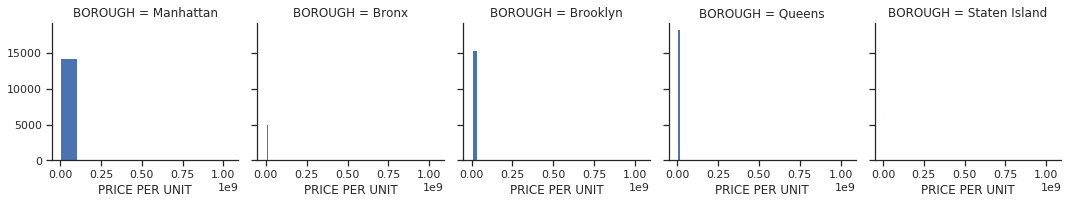

In [189]:
sns.set(style="ticks")
g=sns.FacetGrid(nyc_subset, col='BOROUGH')
g.map(plt.hist, 'PRICE PER UNIT') 

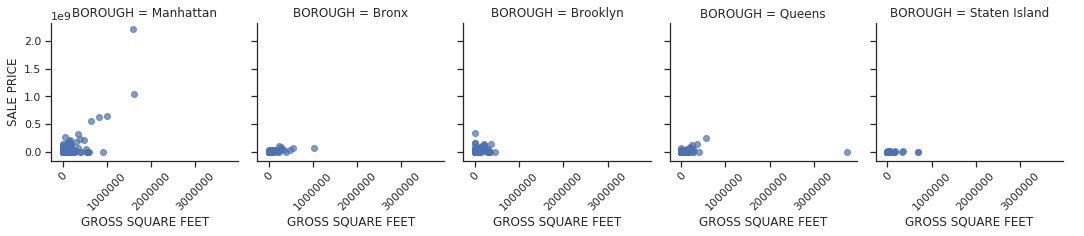

In [190]:
g=sns.FacetGrid(nyc_subset, col='BOROUGH')
g.map(plt.scatter, 'GROSS SQUARE FEET' , 'SALE PRICE', alpha=0.7)
g.set_xticklabels(rotation=45)
g.add_legend();

## Explore Neighborhoods in New York City

#### Let's group the nyc_subset dataframe by borough, neighborhood, and then get the mean sale prices.

In [191]:
# Create anotehr dataframe from nyc_subset.
nyc_grouped2=nyc_subset.groupby(['BOROUGH', 'NEIGHBORHOOD', 'ZIP CODE']).agg({'SALE PRICE':['mean', 'max', 'min'], 'PRICE PER UNIT':['mean']})
nyc_grouped2.columns=['SALE PRICE MEAN', 'SALE PRICE MAX', 'SALE PRICE MIN', 'PRICE/UNIT MEAN']
nyc_grouped2=nyc_grouped2.reset_index()
print(nyc_grouped2.shape)
nyc_grouped2.head(10)

(613, 7)


BOROUGH          NEIGHBORHOOD  ZIP CODE  SALE PRICE MEAN  SALE PRICE MAX  \
0   Bronx              BATHGATE     10451     4.461000e+06       4461000.0   
1   Bronx              BATHGATE     10456     4.000000e+05        400000.0   
2   Bronx              BATHGATE     10457     6.871700e+05       3000000.0   
3   Bronx              BATHGATE     10458     9.413929e+05       4052000.0   
4   Bronx            BAYCHESTER     10466     4.748387e+05       3000000.0   
5   Bronx            BAYCHESTER     10469     3.938067e+05       4750000.0   
6   Bronx            BAYCHESTER     10475     8.860018e+05      11000000.0   
7   Bronx  BEDFORD PARK/NORWOOD     10458     6.830143e+05       7000000.0   
8   Bronx  BEDFORD PARK/NORWOOD     10467     9.544206e+05       7375000.0   
9   Bronx  BEDFORD PARK/NORWOOD     10468     9.497747e+05      11118000.0   

   SALE PRICE MIN  PRICE/UNIT MEAN  
0       4461000.0    171576.920000  
1        400000.0    400000.000000  
2         40000.0    465802.968125  
3         18000.0    229476.034167  
4            10.0    328506.865736  
5             1.0    281702.618589  
6        123000.0    722394.645417  
7            10.0    259213.154110  
8            10.0    438735.046731  
9         72000.0    275719.651379

In [ ]:
len(nyc_grouped2['NEIGHBORHOOD'].unique())

In [192]:
#nyc_grouped2.drop('LATITUDE', axis=1, inplace=True)
#nyc_grouped2.drop('LONGITUDE', axis=1, inplace=True)
nyc_grouped2.insert(3, 'LATITUDE', ' ', allow_duplicates = False)
nyc_grouped2.insert(4, 'LONGITUDE', ' ', allow_duplicates = False)

In [193]:
nyc_grouped2['LATITUDE']=nyc_grouped2['ZIP CODE'].apply(lambda x: pcode_dict.get(x)[0])
nyc_grouped2['LONGITUDE']=nyc_grouped2['ZIP CODE'].apply(lambda x: pcode_dict.get(x)[1])
nyc_grouped2.head(3)

BOROUGH NEIGHBORHOOD  ZIP CODE   LATITUDE  LONGITUDE  SALE PRICE MEAN  \
0   Bronx     BATHGATE     10451  40.819986 -73.918433     4.461000e+06   
1   Bronx     BATHGATE     10456  40.833955 -73.896685     4.000000e+05   
2   Bronx     BATHGATE     10457  40.848111 -73.903813     6.871700e+05   

   SALE PRICE MAX  SALE PRICE MIN  PRICE/UNIT MEAN  
0       4461000.0       4461000.0    171576.920000  
1        400000.0        400000.0    400000.000000  
2       3000000.0         40000.0    465802.968125

In [194]:
nyc_grouped2.shape

(613, 9)

In [ ]:
#save the results to a csv file.
nyc_grouped2.to_csv('nyc_grouped2.csv')

In [ ]:
#nyc_grouped2=pd.read_csv('nyc_grouped2.csv')
#nyc_grouped2.drop('Unnamed: 0', axis=1, inplace=True)
#nyc_grouped2.head(3)

In [195]:
nyc_grouped2.head(2)

BOROUGH NEIGHBORHOOD  ZIP CODE   LATITUDE  LONGITUDE  SALE PRICE MEAN  \
0   Bronx     BATHGATE     10451  40.819986 -73.918433        4461000.0   
1   Bronx     BATHGATE     10456  40.833955 -73.896685         400000.0   

   SALE PRICE MAX  SALE PRICE MIN  PRICE/UNIT MEAN  
0       4461000.0       4461000.0        171576.92  
1        400000.0        400000.0        400000.00

In [196]:
import requests

CLIENT_ID = 'HMXQOBCXIIUJCFVWBN5WKFCO1FSN4XKFZSQGOWZMN4BJYWD1' # your Foursquare ID
CLIENT_SECRET = '5CH1M503NL4N3YVPLIZTJQ0YXVH4JAG4ZM25F0VTTQHRR0V0' # your Foursquare Secret
VERSION = '20200625' # Foursquare API version
LIMIT = 30

def getNearbyVenues(borough, names, zipcodes, latitudes, longitudes, radius=180):
    
    venues_list=[]
    for borough, name, zipcode, lat, lng in zip(borough, names, zipcodes, latitudes, longitudes):
        print(borough, name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        #print(url)
            
        #url = 'https://api.foursquare.com/v2/venues/explore?client_id=3B0KVYFLXWC453QUWTA3R1UEWBS2O4IFPTGWQYX1S0C1FBL5&client_secret=2BOWYLHI3EM04QMVVUA3FCGCTOGUCGDPQJFNHEO5WUFD5KXD&ll=40.87655077879964,-73.91065965862981&v=20200618&radius=500&limit=100'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            borough,
            name,
            zipcode,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                             'Neighborhood',
                             'Zip Code',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [197]:
nyc_venues=getNearbyVenues(borough=nyc_grouped2['BOROUGH'],
                           names=nyc_grouped2['NEIGHBORHOOD'],
                           zipcodes=nyc_grouped2['ZIP CODE'],
                           latitudes=nyc_grouped2['LATITUDE'],
                           longitudes=nyc_grouped2['LONGITUDE'])

Bronx BATHGATE
Bronx BATHGATE
Bronx BATHGATE
Bronx BATHGATE
Bronx BAYCHESTER
Bronx BAYCHESTER
Bronx BAYCHESTER
Bronx BEDFORD PARK/NORWOOD
Bronx BEDFORD PARK/NORWOOD
Bronx BEDFORD PARK/NORWOOD
Bronx BELMONT
Bronx BELMONT
Bronx BRONX PARK
Bronx BRONXDALE
Bronx BRONXDALE
Bronx CASTLE HILL/UNIONPORT
Bronx CASTLE HILL/UNIONPORT
Bronx CITY ISLAND
Bronx CITY ISLAND
Bronx CITY ISLAND-PELHAM STRIP
Bronx CO-OP CITY
Bronx COUNTRY CLUB
Bronx CROTONA PARK
Bronx CROTONA PARK
Bronx CROTONA PARK
Bronx EAST RIVER
Bronx EAST TREMONT
Bronx EAST TREMONT
Bronx FIELDSTON
Bronx FORDHAM
Bronx FORDHAM
Bronx FORDHAM
Bronx FORDHAM
Bronx HIGHBRIDGE/MORRIS HEIGHTS
Bronx HIGHBRIDGE/MORRIS HEIGHTS
Bronx HUNTS POINT
Bronx HUNTS POINT
Bronx KINGSBRIDGE HTS/UNIV HTS
Bronx KINGSBRIDGE HTS/UNIV HTS
Bronx KINGSBRIDGE HTS/UNIV HTS
Bronx KINGSBRIDGE/JEROME PARK
Bronx KINGSBRIDGE/JEROME PARK
Bronx KINGSBRIDGE/JEROME PARK
Bronx MELROSE/CONCOURSE
Bronx MELROSE/CONCOURSE
Bronx MELROSE/CONCOURSE
Bronx MELROSE/CONCOURSE
Bronx MOR

In [198]:
nyc_venues.shape

(4621, 9)

In [199]:
nyc_venues.head()

Borough Neighborhood  Zip Code  Neighborhood Latitude  \
0   Bronx     BATHGATE     10451              40.819986   
1   Bronx     BATHGATE     10456              40.833955   
2   Bronx     BATHGATE     10456              40.833955   
3   Bronx     BATHGATE     10456              40.833955   
4   Bronx     BATHGATE     10456              40.833955   

   Neighborhood Longitude                          Venue  Venue Latitude  \
0              -73.918433                      Pepe Joes       40.820838   
1              -73.896685             JC Wines & liqours       40.834490   
2              -73.896685          Prospect Gourmet Deli       40.833674   
3              -73.896685          Fine Fare Supermarket       40.834043   
4              -73.896685  FOOT LOCKER - CONCOURSE PLAZA       40.834428   

   Venue Longitude Venue Category  
0       -73.917523    Pizza Place  
1       -73.896980   Liquor Store  
2       -73.896681  Deli / Bodega  
3       -73.894640    Supermarket  
4       -73.895602     Shoe Store

In [ ]:
nyc_venues.to_csv('nyc_venues_new.csv')

In [200]:
print('There are {} unique categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 247 unique categories.


### Analyze Each Neighborhood

In [ ]:
nyc_venues=pd.read_csv('nyc_venues_new.csv')

In [201]:
nyc_onehot=pd.get_dummies(nyc_venues[['Venue Category']], prefix='', prefix_sep='')
#nyc_onehot.drop(['Neighborhood'], axis=1, inplace=True)
print(nyc_onehot.shape)
nyc_onehot.head(2)

(4621, 247)


Accessories Store  African Restaurant  American Restaurant  Antique Shop  \
0                  0                   0                    0             0   
1                  0                   0                    0             0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0            0           0                    0                 0   
1            0           0                    0                 0   

   Athletics & Sports  Australian Restaurant  BBQ Joint  Baby Store  \
0                   0                      0          0           0   
1                   0                      0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Basketball Court  Beach Bar  \
0           0       0     0    0               0                 0          0   
1           0       0     0    0               0                 0          0   

   Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  Bike Trail  Bistro  \
0                0         0            0           0           0       0   
1                0         0            0           0           0       0   

   Board Shop  Bookstore  Boutique  Bowling Alley  Boxing Gym  Breakfast Spot  \
0           0          0         0              0           0               0   
1           0          0         0              0           0               0   

   Bridal Shop  Bubble Tea Shop  Building  Burger Joint  Burrito Place  \
0            0                0         0             0              0   
1            0                0         0             0              0   

   Bus Line  Bus Station  Bus Stop  Business Service  Café  Candy Store  \
0         0            0         0                 0     0            0   
1         0            0         0                 0     0            0   

   Cantonese Restaurant  Caribbean Restaurant  Cheese Shop  \
0                     0                     0            0   
1                     0                     0            0   

   Chinese Restaurant  Chocolate Shop  Clothing Store  Cocktail Bar  \
0                   0               0               0             0   
1                   0               0               0             0   

   Coffee Shop  College Academic Building  College Bookstore  College Track  \
0            0                          0                  0              0   
1            0                          0                  0              0   

   Comedy Club  Comic Shop  Community Center  Concert Hall  Convenience Store  \
0            0           0                 0             0                  0   
1            0           0                 0             0                  0   

   Cosmetics Shop  Creperie  Cuban Restaurant  Cupcake Shop  Cycle Studio  \
0               0         0                 0             0             0   
1               0         0                 0             0             0   

   Dance Studio  Deli / Bodega  Dentist's Office  Department Store  Diner  \
0             0              0                 0                 0      0   
1             0              0                 0                 0      0   

   Discount Store  Dive Bar  Doctor's Office  Dog Run  Donut Shop  Drugstore  \
0               0         0                0        0           0          0   
1               0         0                0        0           0          0   

   Dumpling Restaurant  Eastern European Restaurant  Electronics Store  \
0                    0                            0                  0   
1                    0                            0                  0   

   Entertainment Service  Ethiopian Restaurant  Event Space  Exhibit  \
0                      0                     0            0        0   
1                      0                     0            0        0   

   Falafel Restaurant  Farmers Market  Fast Food Restaurant  \
0                   0               0                     0   
1                   

In [202]:
# one hot encoding
print(nyc_onehot.columns)
#add neighborhood column back to dataframe
borough=nyc_venues['Borough'].values
neighborhood=nyc_venues['Neighborhood'].values
zip_code=nyc_venues['Zip Code']

#yc_onehot.drop(['Neighborhood'], axis=1, inplace=True)
nyc_onehot.insert(0, 'Borough', borough, allow_duplicates=False)
nyc_onehot.insert(1, 'Neighborhood', neighborhood, allow_duplicates=False)
nyc_onehot.insert(2, 'Zip Code', zip_code, allow_duplicates=False)


fixed_columns=list(nyc_onehot.columns)
               
#print(fixed_columns)
nyc_onehot=nyc_onehot[fixed_columns]

nyc_onehot.head()

Index(['Accessories Store', 'African Restaurant', 'American Restaurant',
       'Antique Shop', 'Art Gallery', 'Art Museum', 'Arts & Crafts Store',
       'Asian Restaurant', 'Athletics & Sports', 'Australian Restaurant',
       ...
       'Video Game Store', 'Video Store', 'Vietnamese Restaurant',
       'Watch Shop', 'Whisky Bar', 'Wine Bar', 'Wine Shop', 'Wings Joint',
       'Women's Store', 'Yoga Studio'],
      dtype='object', length=247)


Borough Neighborhood  Zip Code  Accessories Store  African Restaurant  \
0   Bronx     BATHGATE     10451                  0                   0   
1   Bronx     BATHGATE     10456                  0                   0   
2   Bronx     BATHGATE     10456                  0                   0   
3   Bronx     BATHGATE     10456                  0                   0   
4   Bronx     BATHGATE     10456                  0                   0   

   American Restaurant  Antique Shop  Art Gallery  Art Museum  \
0                    0             0            0           0   
1                    0             0            0           0   
2                    0             0            0           0   
3                    0             0            0           0   
4                    0             0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   0   

   Australian Restaurant  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  \
0                      0          0           0           0       0     0   
1                      0          0           0           0       0     0   
2                      0          0           0           0       0     0   
3                      0          0           0           0       0     0   
4                      0          0           0           0       0     0   

   Bar  Baseball Field  Basketball Court  Beach Bar  Bed & Breakfast  \
0    0               0                 0          0                0   
1    0               0                 0          0                0   
2    0               0                 0          0                0   
3    0               0                 0          0                0   
4    0               0                 0          0                0   

   Beer Bar  Beer Garden  Beer Store  Bike Trail  Bistro  Board Shop  \
0         0            0           0           0       0           0   
1         0            0           0           0       0           0   
2         0            0           0           0       0           0   
3         0            0           0           0       0           0   
4         0            0           0           0       0           0   

   Bookstore  Boutique  Bowling Alley  Boxing Gym  Breakfast Spot  \
0          0         0              0           0               0   
1          0         0              0           0               0   
2          0         0              0           0               0   
3          0         0              0           0               0   
4          0         0              0           0               0   

   Bridal Shop  Bubble Tea Shop  Building  Burger Joint  Burrito Place  \
0            0                0         0             0              0   
1            0                0         0             0              0   
2            0                0         0             0              0   
3            0                0         0             0              0   
4            0                0         0             0              0   

   Bus Line  Bus Station  Bus Stop  Business Service  Café  Candy Store  \
0         0            0         0                 0     0            0   
1         0            0         0                 0     0            0   
2         0            0         0                 0     0            0   
3         0            0         0                 0     0            0   
4         0            0         0                 0     0            0   

   Cantonese Restaurant  Caribbean Restaurant  Cheese Shop  \
0                     0                     0            0   
1          

In [203]:
nyc_onehot=nyc_onehot.rename({'Zip Code': 'Zip_Code'}, axis=1)
nyc_onehot.head(2)

Borough Neighborhood  Zip_Code  Accessories Store  African Restaurant  \
0   Bronx     BATHGATE     10451                  0                   0   
1   Bronx     BATHGATE     10456                  0                   0   

   American Restaurant  Antique Shop  Art Gallery  Art Museum  \
0                    0             0            0           0   
1                    0             0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0                    0                 0                   0   
1                    0                 0                   0   

   Australian Restaurant  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  \
0                      0          0           0           0       0     0   
1                      0          0           0           0       0     0   

   Bar  Baseball Field  Basketball Court  Beach Bar  Bed & Breakfast  \
0    0               0                 0          0                0   
1    0               0                 0          0                0   

   Beer Bar  Beer Garden  Beer Store  Bike Trail  Bistro  Board Shop  \
0         0            0           0           0       0           0   
1         0            0           0           0       0           0   

   Bookstore  Boutique  Bowling Alley  Boxing Gym  Breakfast Spot  \
0          0         0              0           0               0   
1          0         0              0           0               0   

   Bridal Shop  Bubble Tea Shop  Building  Burger Joint  Burrito Place  \
0            0                0         0             0              0   
1            0                0         0             0              0   

   Bus Line  Bus Station  Bus Stop  Business Service  Café  Candy Store  \
0         0            0         0                 0     0            0   
1         0            0         0                 0     0            0   

   Cantonese Restaurant  Caribbean Restaurant  Cheese Shop  \
0                     0                     0            0   
1                     0                     0            0   

   Chinese Restaurant  Chocolate Shop  Clothing Store  Cocktail Bar  \
0                   0               0               0             0   
1                   0               0               0             0   

   Coffee Shop  College Academic Building  College Bookstore  College Track  \
0            0                          0                  0              0   
1            0                          0                  0              0   

   Comedy Club  Comic Shop  Community Center  Concert Hall  Convenience Store  \
0            0           0                 0             0                  0   
1            0           0                 0             0                  0   

   Cosmetics Shop  Creperie  Cuban Restaurant  Cupcake Shop  Cycle Studio  \
0               0         0                 0             0             0   
1               0         0                 0             0             0   

   Dance Studio  Deli / Bodega  Dentist's Office  Department Store  Diner  \
0             0              0                 0                 0      0   
1             0              0                 0                 0      0   

   Discount Store  Dive Bar  Doctor's Office  Dog Run  Donut Shop  Drugstore  \
0               0         0                0        0           0          0   
1               0         0                0        0           0          0   

   Dumpling Restaurant  Eastern European Restaurant  Electronics Store  \
0                    0                            0                  0   
1                    0                            0                  0   

   Entertainment Service  Ethiopian Restaurant  Event Space  Exhibit  \
0                      0                     0            0        0   
1                      0                     0            0        0   

   Falafel Restaurant  Farmers Marke

Add a new column to *nyc_onehot* dataframe, which is a joined name of **Borough**, **Neighborhood**, and **Zip_Code**. And name it as a new dataframe *nyc_onehot2*.

In [204]:
#nyc_onehot.drop('Location', axis=1, inplace=True)
nyc_onehot.insert(3, 'Location', ' ', allow_duplicates = False)
nyc_onehot2=nyc_onehot.assign(Location=nyc_onehot.Borough.astype(str) + ',' + \
                              nyc_onehot.Neighborhood.astype(str) + ','+ \
                              nyc_onehot.Zip_Code.astype(str))
nyc_onehot2.head()

Borough Neighborhood  Zip_Code              Location  Accessories Store  \
0   Bronx     BATHGATE     10451  Bronx,BATHGATE,10451                  0   
1   Bronx     BATHGATE     10456  Bronx,BATHGATE,10456                  0   
2   Bronx     BATHGATE     10456  Bronx,BATHGATE,10456                  0   
3   Bronx     BATHGATE     10456  Bronx,BATHGATE,10456                  0   
4   Bronx     BATHGATE     10456  Bronx,BATHGATE,10456                  0   

   African Restaurant  American Restaurant  Antique Shop  Art Gallery  \
0                   0                    0             0            0   
1                   0                    0             0            0   
2                   0                    0             0            0   
3                   0                    0             0            0   
4                   0                    0             0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Australian Restaurant  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  \
0                      0          0           0           0       0     0   
1                      0          0           0           0       0     0   
2                      0          0           0           0       0     0   
3                      0          0           0           0       0     0   
4                      0          0           0           0       0     0   

   Bar  Baseball Field  Basketball Court  Beach Bar  Bed & Breakfast  \
0    0               0                 0          0                0   
1    0               0                 0          0                0   
2    0               0                 0          0                0   
3    0               0                 0          0                0   
4    0               0                 0          0                0   

   Beer Bar  Beer Garden  Beer Store  Bike Trail  Bistro  Board Shop  \
0         0            0           0           0       0           0   
1         0            0           0           0       0           0   
2         0            0           0           0       0           0   
3         0            0           0           0       0           0   
4         0            0           0           0       0           0   

   Bookstore  Boutique  Bowling Alley  Boxing Gym  Breakfast Spot  \
0          0         0              0           0               0   
1          0         0              0           0               0   
2          0         0              0           0               0   
3          0         0              0           0               0   
4          0         0              0           0               0   

   Bridal Shop  Bubble Tea Shop  Building  Burger Joint  Burrito Place  \
0            0                0         0             0              0   
1            0                0         0             0              0   
2            0                0         0             0              0   
3            0                0         0             0              0   
4            0                0         0             0              0   

   Bus Line  Bus Station  Bus Stop  Business Service  Café  Candy Store  \
0         0            0         0                 0     0            0   
1         0            0         0                 0     0            0   
2         0            0         0                 0     0            0   
3         0            0         0                 0     0            0   
4         0            0         0                 0     0            0   

   

In [206]:
len(nyc_onehot['Zip_Code'].unique())

150

In [207]:
len(nyc_onehot2['Location'].unique())

469

Group the *nyc_onehot2* dataframe by location info and get the mean value for all venues, which indicates the frequency of venues around each location. 

In [208]:
nyc_onehot_g=nyc_onehot2.groupby(['Borough', 'Neighborhood', 'Zip_Code', 'Location']).mean().reset_index()
print(nyc_onehot_g.shape)
nyc_onehot_g.head()

(469, 251)


Borough Neighborhood  Zip_Code                Location  Accessories Store  \
0   Bronx     BATHGATE     10451    Bronx,BATHGATE,10451                0.0   
1   Bronx     BATHGATE     10456    Bronx,BATHGATE,10456                0.0   
2   Bronx     BATHGATE     10457    Bronx,BATHGATE,10457                0.0   
3   Bronx     BATHGATE     10458    Bronx,BATHGATE,10458                0.0   
4   Bronx   BAYCHESTER     10466  Bronx,BAYCHESTER,10466                0.0   

   African Restaurant  American Restaurant  Antique Shop  Art Gallery  \
0                 0.0                  0.0           0.0          0.0   
1                 0.0                  0.0           0.0          0.0   
2                 0.0                  0.0           0.0          0.0   
3                 0.0                  0.0           0.0          0.0   
4                 0.0                  0.0           0.0          0.0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0         0.0                  0.0               0.0                 0.0   
1         0.0                  0.0               0.0                 0.0   
2         0.0                  0.0               0.0                 0.0   
3         0.0                  0.0               0.0                 0.0   
4         0.0                  0.0               0.0                 0.0   

   Australian Restaurant  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  \
0                    0.0        0.0         0.0         0.0     0.0   0.0   
1                    0.0        0.0         0.0         0.0     0.0   0.0   
2                    0.0        0.0         0.0         0.0     0.0   0.0   
3                    0.0        0.0         0.0         0.0     0.0   0.0   
4                    0.0        0.0         0.0         0.0     0.0   0.0   

   Bar  Baseball Field  Basketball Court  Beach Bar  Bed & Breakfast  \
0  0.0             0.0               0.0        0.0              0.0   
1  0.0             0.0               0.0        0.0              0.0   
2  0.0             0.0               0.0        0.0              0.0   
3  0.0             0.0               0.0        0.0              0.0   
4  0.0             0.0               0.0        0.0              0.0   

   Beer Bar  Beer Garden  Beer Store  Bike Trail  Bistro  Board Shop  \
0       0.0          0.0         0.0         0.0     0.0         0.0   
1       0.0          0.0         0.0         0.0     0.0         0.0   
2       0.0          0.0         0.0         0.0     0.0         0.0   
3       0.0          0.0         0.0         0.0     0.0         0.0   
4       0.0          0.0         0.0         0.0     0.0         0.0   

   Bookstore  Boutique  Bowling Alley  Boxing Gym  Breakfast Spot  \
0        0.0       0.0            0.0         0.0             0.0   
1        0.0       0.0            0.0         0.0             0.0   
2        0.0       0.0            0.0         0.0             0.0   
3        0.0       0.0            0.0         0.0             0.0   
4        0.0       0.0            0.0         0.0             0.0   

   Bridal Shop  Bubble Tea Shop  Building  Burger Joint  Burrito Place  \
0          0.0              0.0       0.0           0.0            0.0   
1          0.0              0.0       0.0           0.0            0.0   
2          0.0              0.0       0.0           0.0            0.0   
3          0.0              0.0       0.0           0.0            0.0   
4          0.0              0.0       0.0           0.0            0.0   

   Bus Line  Bus Station  Bus Stop  Business Service  Café  Candy Store  \
0       0.0          0.0       0.0               0.0   0.0          0.0   
1       0.0          0.2       0.0               0.0   0.0          0.0   
2       0.0          0.0       0.0               0.0   0.0          0.0   
3       0.0          0.0       0.0               0.0   0.0          0.0   
4       0.0          0.0       0.0               0.0   0.0         

Check dataframe *nyc_grouped2*. And make some adjustment to the dataframe.

In [209]:
nyc_grouped2.head(2)

BOROUGH NEIGHBORHOOD  ZIP CODE   LATITUDE  LONGITUDE  SALE PRICE MEAN  \
0   Bronx     BATHGATE     10451  40.819986 -73.918433        4461000.0   
1   Bronx     BATHGATE     10456  40.833955 -73.896685         400000.0   

   SALE PRICE MAX  SALE PRICE MIN  PRICE/UNIT MEAN  
0       4461000.0       4461000.0        171576.92  
1        400000.0        400000.0        400000.00

In [210]:
nyc_grouped2=nyc_grouped2.rename({'ZIP CODE': 'ZIP_CODE'}, axis=1)
nyc_grouped2.head(2)

BOROUGH NEIGHBORHOOD  ZIP_CODE   LATITUDE  LONGITUDE  SALE PRICE MEAN  \
0   Bronx     BATHGATE     10451  40.819986 -73.918433        4461000.0   
1   Bronx     BATHGATE     10456  40.833955 -73.896685         400000.0   

   SALE PRICE MAX  SALE PRICE MIN  PRICE/UNIT MEAN  
0       4461000.0       4461000.0        171576.92  
1        400000.0        400000.0        400000.00

In [211]:
nyc_grouped2.insert(3, 'Location', ' ', allow_duplicates = False)
nyc_grouped2=nyc_grouped2.assign(Location=nyc_grouped2.BOROUGH.astype(str) + ',' + \
                              nyc_grouped2.NEIGHBORHOOD.astype(str) + ','+ \
                              nyc_grouped2.ZIP_CODE.astype(str))
nyc_grouped2.head(2)

BOROUGH NEIGHBORHOOD  ZIP_CODE              Location   LATITUDE  LONGITUDE  \
0   Bronx     BATHGATE     10451  Bronx,BATHGATE,10451  40.819986 -73.918433   
1   Bronx     BATHGATE     10456  Bronx,BATHGATE,10456  40.833955 -73.896685   

   SALE PRICE MEAN  SALE PRICE MAX  SALE PRICE MIN  PRICE/UNIT MEAN  
0        4461000.0       4461000.0       4461000.0        171576.92  
1         400000.0        400000.0        400000.0        400000.00

### Let's sort the neighborhood venues and find the top 3 most common venues for each location.

First, let's write a functino to sort the venues in descending order.

In [212]:
print(type(nyc_onehot_g.iloc[1, :][5:].sort_values(ascending=False)))
nyc_onehot_g.iloc[1, :][5:].sort_values(ascending=False).index.values[0:5]

<class 'pandas.core.series.Series'>


array(['Deli / Bodega', 'Liquor Store', 'Shoe Store', 'Supermarket',
       'Bus Station'], dtype=object)

In [213]:
def return_most_common_venues(row, num_top_venues):
    row_categories=row.iloc[5:]
    row_categories_sorted=row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now, let's create the new dataframe and display the top 10 venues for each location.

In [214]:
num_top_venues=10
indicators = ['st', 'nd', 'rd']

#create columns according to number of top venues
columns=['Borough', 'Neighborhood', 'Zip_Code', 'Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
#create a new dataframe
location_venues_sorted=pd.DataFrame(columns=columns)
location_venues_sorted['Borough'] = nyc_onehot_g['Borough']
location_venues_sorted['Neighborhood'] = nyc_onehot_g['Neighborhood']
location_venues_sorted['Zip_Code'] = nyc_onehot_g['Zip_Code']
location_venues_sorted['Location'] = nyc_onehot_g['Location']

for n in np.arange(nyc_onehot_g.shape[0]):
    location_venues_sorted.iloc[n, 4:]=return_most_common_venues(nyc_onehot_g.iloc[n, :], num_top_venues)
location_venues_sorted.head()

Borough Neighborhood  Zip_Code                Location  \
0   Bronx     BATHGATE     10451    Bronx,BATHGATE,10451   
1   Bronx     BATHGATE     10456    Bronx,BATHGATE,10456   
2   Bronx     BATHGATE     10457    Bronx,BATHGATE,10457   
3   Bronx     BATHGATE     10458    Bronx,BATHGATE,10458   
4   Bronx   BAYCHESTER     10466  Bronx,BAYCHESTER,10466   

  1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
0           Pizza Place           Yoga Studio  Entertainment Service   
1         Deli / Bodega          Liquor Store             Shoe Store   
2         Deli / Bodega        Sandwich Place          Grocery Store   
3           Coffee Shop        Sandwich Place               Wine Bar   
4                 Diner           Yoga Studio   Ethiopian Restaurant   

  4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
0            Food Court      Food & Drink Shop                  Food   
1           Supermarket            Bus Station           Yoga Studio   
2           Yoga Studio  Entertainment Service     Food & Drink Shop   
3           Yoga Studio   Fast Food Restaurant           Event Space   
4            Food Truck             Food Court     Food & Drink Shop   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0           Flower Shop           Flea Market   Filipino Restaurant   
1  Fast Food Restaurant               Exhibit    Falafel Restaurant   
2                  Food           Flower Shop           Flea Market   
3               Exhibit    Falafel Restaurant        Farmers Market   
4                  Food           Flower Shop           Flea Market   

  10th Most Common Venue  
0   Fast Food Restaurant  
1         Farmers Market  
2    Filipino Restaurant  
3    Filipino Restaurant  
4    Filipino Restaurant

## Cluster Neighborhoods

Run K-means to cluster the neighborhoods.

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 5 (since we have 5 boroughs)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

First, let's use the Elbow Method to determine optimal value of K in KMeans. 

In [215]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
from sklearn import preprocessing
import matplotlib.pyplot as plt

We define the following:   

  **Distortion**: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
  **Inertia**: It is the sum of squared distances of samples to their closest cluster center.

In [216]:
X=nyc_onehot_g.drop(['Borough', 'Neighborhood', 'Zip_Code', 'Location'], 1)
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

Ks=range(1, 10)

for k in Ks:
    kmeans = KMeans(n_clusters = k).fit(X)
    #kmeans.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,'euclidean'), axis=1))/X.shape[0])
    inertias.append(kmeans.inertia_)
    
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,'euclidean'), axis=1))/X.shape[0]
    mapping1[k] = kmeans.inertia_

Text(0.5, 1.0, 'The Elbow Method using Distortion')

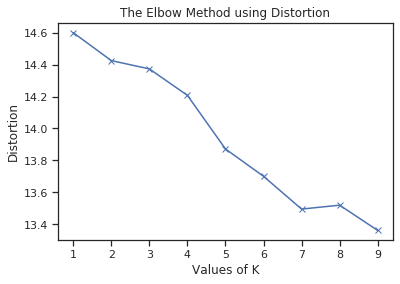

In [217]:
plt.plot(Ks, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')

Text(0.5, 1.0, 'The Elbow Method using Distortion')

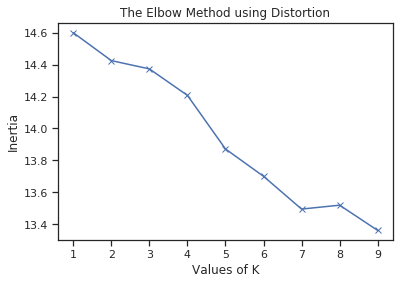

In [218]:
plt.plot(Ks, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Distortion')

Since there is no distinct elbow shown in the Elbow graph above, I decided to choose k=3.

In [219]:
from sklearn.cluster import KMeans 

kclusters=3
X=nyc_onehot_g.drop(['Borough', 'Neighborhood', 'Zip_Code', 'Location'], 1)

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters = kclusters, n_init = 12, random_state=0).fit(X)

#check cluster labels generated for each row in the dataframe
labels=kmeans.labels_
labels

array([0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

As shown in the elow method graphs, no distinct elbow point was shown. However, this does not mean that there are no clusters in the data. No elbow means that the algorithm used cannot separate clusters. Thus, I decided to use the  DBSCAN method instead.

## Let's try DBSCAN Clustering

In [220]:
X=nyc_onehot_g.drop(['Borough', 'Neighborhood', 'Zip_Code', 'Location'], 1)
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [221]:
from sklearn.cluster import DBSCAN 
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels_db = db.labels_
labels_db

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
        0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [222]:
unique_labels = set(labels_db)
unique_labels

{-1, 0, 1, 2}

In [223]:
print(nyc_grouped2.shape)
nyc_grouped2.head(2)

(613, 10)


BOROUGH NEIGHBORHOOD  ZIP_CODE              Location   LATITUDE  LONGITUDE  \
0   Bronx     BATHGATE     10451  Bronx,BATHGATE,10451  40.819986 -73.918433   
1   Bronx     BATHGATE     10456  Bronx,BATHGATE,10456  40.833955 -73.896685   

   SALE PRICE MEAN  SALE PRICE MAX  SALE PRICE MIN  PRICE/UNIT MEAN  
0        4461000.0       4461000.0       4461000.0        171576.92  
1         400000.0        400000.0        400000.0        400000.00

Let's join the *nyc_onehot_g* dataframe with *nyc_grouped2* dataframe based on their common rows.

In [225]:
# add clustering labels
#location_venues_sorted=location_venues_sorted.drop('Cluster Labels', axis=1)
location_venues_sorted.insert(0, 'Cluster Labels', labels_db)
nyc_merged=nyc_grouped2

#merge nyc_grouped2 with nyc_onehot_g to add latitude, longitude, housing price info for each location.
nyc_merged=nyc_grouped2.join(location_venues_sorted.set_index('Location'), on='Location', how='inner')
nyc_merged.drop(['Borough', 'Neighborhood', 'Zip_Code'], axis=1, inplace=True)

print(nyc_merged.shape)
nyc_merged.head()

(469, 21)


BOROUGH NEIGHBORHOOD  ZIP_CODE                Location   LATITUDE  \
0   Bronx     BATHGATE     10451    Bronx,BATHGATE,10451  40.819986   
1   Bronx     BATHGATE     10456    Bronx,BATHGATE,10456  40.833955   
2   Bronx     BATHGATE     10457    Bronx,BATHGATE,10457  40.848111   
3   Bronx     BATHGATE     10458    Bronx,BATHGATE,10458  40.862059   
4   Bronx   BAYCHESTER     10466  Bronx,BAYCHESTER,10466  40.887857   

   LONGITUDE  SALE PRICE MEAN  SALE PRICE MAX  SALE PRICE MIN  \
0 -73.918433     4.461000e+06       4461000.0       4461000.0   
1 -73.896685     4.000000e+05        400000.0        400000.0   
2 -73.903813     6.871700e+05       3000000.0         40000.0   
3 -73.887575     9.413929e+05       4052000.0         18000.0   
4 -73.827943     4.748387e+05       3000000.0            10.0   

   PRICE/UNIT MEAN  Cluster Labels 1st Most Common Venue  \
0    171576.920000              -1           Pizza Place   
1    400000.000000              -1         Deli / Bodega   
2    465802.968125              -1         Deli / Bodega   
3    229476.034167              -1           Coffee Shop   
4    328506.865736              -1                 Diner   

  2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
0           Yoga Studio  Entertainment Service            Food Court   
1          Liquor Store             Shoe Store           Supermarket   
2        Sandwich Place          Grocery Store           Yoga Studio   
3        Sandwich Place               Wine Bar           Yoga Studio   
4           Yoga Studio   Ethiopian Restaurant            Food Truck   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0      Food & Drink Shop                  Food           Flower Shop   
1            Bus Station           Yoga Studio  Fast Food Restaurant   
2  Entertainment Service     Food & Drink Shop                  Food   
3   Fast Food Restaurant           Event Space               Exhibit   
4             Food Court     Food & Drink Shop                  Food   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0           Flea Market   Filipino Restaurant   Fast Food Restaurant  
1               Exhibit    Falafel Restaurant         Farmers Market  
2           Flower Shop           Flea Market    Filipino Restaurant  
3    Falafel Restaurant        Farmers Market    Filipino Restaurant  
4           Flower Shop           Flea Market    Filipino Restaurant

In [ ]:
nyc_merged=nyc_merged.rename({'BOROUGH':'Borough', 'NEIGHBORHOOD': 'Neighborhood', \
                              'ZIP_CODE': 'Zip_Code', 'LATITUDE':'Latitude', \
                              'LONGITUDE':'Longitude', 'SALE PRICE MEAN' : 'Sale Price Mean', \
                              'SALE PRICE MAX': 'Sale Price Max', \
                              'SALE PRICE MIN': 'Sale Price Min', \
                              'PRICE/UNIT MEAN': 'Price/Unit Mean'}, axis=1)
nyc_merged.head()

In [40]:
nyc_merged=pd.read_csv('nyc_merged_2#.csv')
nyc_merged.drop('Unnamed: 0', axis=1, inplace=True)
nyc_merged.head()

Borough Neighborhood  Zip_Code                Location   Latitude  \
0   Bronx     BATHGATE     10451    Bronx,BATHGATE,10451  40.819986   
1   Bronx     BATHGATE     10456    Bronx,BATHGATE,10456  40.833955   
2   Bronx     BATHGATE     10457    Bronx,BATHGATE,10457  40.848111   
3   Bronx     BATHGATE     10458    Bronx,BATHGATE,10458  40.862059   
4   Bronx   BAYCHESTER     10466  Bronx,BAYCHESTER,10466  40.887857   

   Longitude  Sale Price Mean  Sale Price Max  Sale Price Min  \
0 -73.918433     4.461000e+06       4461000.0       4461000.0   
1 -73.896685     4.000000e+05        400000.0        400000.0   
2 -73.903813     6.871700e+05       3000000.0         40000.0   
3 -73.887575     9.413929e+05       4052000.0         18000.0   
4 -73.827943     4.748387e+05       3000000.0            10.0   

   Price/Unit Mean  Cluster Labels 1st Most Common Venue  \
0    171576.920000              -1           Pizza Place   
1    400000.000000              -1          Liquor Store   
2    465802.968125              -1         Deli / Bodega   
3    229476.034167              -1           Coffee Shop   
4    328506.865736              -1                 Diner   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Yoga Studio  Ethiopian Restaurant     French Restaurant   
1            Playground         Deli / Bodega           Supermarket   
2         Grocery Store        Sandwich Place           Yoga Studio   
3               Theater        Sandwich Place                  Café   
4      Business Service           Yoga Studio           Event Space   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0            Food Truck            Food Court     Food & Drink Shop   
1            Shoe Store           Bus Station           Yoga Studio   
2  Ethiopian Restaurant            Food Truck            Food Court   
3           Yoga Studio        Farmers Market               Exhibit   
4     French Restaurant            Food Truck            Food Court   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
0           Flower Shop           Flea Market    Filipino Restaurant   
1  Fast Food Restaurant               Exhibit     Falafel Restaurant   
2     Food & Drink Shop           Flower Shop            Flea Market   
3    Falafel Restaurant  Fast Food Restaurant   Ethiopian Restaurant   
4     Food & Drink Shop           Flower Shop            Flea Market   

                              Top_Common_Venues  
0  Pizza Place,Yoga Studio,Ethiopian Restaurant  
1         Liquor Store,Playground,Deli / Bodega  
2    Deli / Bodega,Grocery Store,Sandwich Place  
3            Coffee Shop,Theater,Sandwich Place  
4            Diner,Business Service,Yoga Studio

In [41]:
nyc_merged['1st Most Common Venue'].value_counts().sort_values(ascending=False)

Italian Restaurant           35
Bar                          31
Deli / Bodega                24
Chinese Restaurant           20
Coffee Shop                  17
Pizza Place                  16
Baseball Field               16
Bakery                       13
Park                         12
Fried Chicken Joint          11
Burger Joint                 10
Bus Station                  10
Spa                           9
Liquor Store                  9
Donut Shop                    9
Furniture / Home Store        8
Pharmacy                      8
Pub                           8
American Restaurant           8
Yoga Studio                   8
Food Truck                    7
Mexican Restaurant            6
Sushi Restaurant              6
Convenience Store             6
Cosmetics Shop                6
Trail                         6
Intersection                  5
Sports Bar                    5
Dance Studio                  5
Caribbean Restaurant          5
Gas Station                   5
Diner   

In [139]:
nyc_counts_1st=nyc_merged.groupby('Cluster Labels')['1st Most Common Venue'].value_counts().sort_values(ascending=False)
nyc_counts_2nd=nyc_merged.groupby('Cluster Labels')['2nd Most Common Venue'].value_counts().sort_values(ascending=False)
nyc_counts_3rd=nyc_merged.groupby('Cluster Labels')['3rd Most Common Venue'].value_counts().sort_values(ascending=False)
nyc_counts_4th=nyc_merged.groupby('Cluster Labels')['4th Most Common Venue'].value_counts().sort_values(ascending=False)
nyc_counts_5th=nyc_merged.groupby('Cluster Labels')['5th Most Common Venue'].value_counts().sort_values(ascending=False)
nyc_counts_6th=nyc_merged.groupby('Cluster Labels')['6th Most Common Venue'].value_counts().sort_values(ascending=False)
nyc_counts_7th=nyc_merged.groupby('Cluster Labels')['7th Most Common Venue'].value_counts().sort_values(ascending=False)
nyc_counts_8th=nyc_merged.groupby('Cluster Labels')['8th Most Common Venue'].value_counts().sort_values(ascending=False)
nyc_counts_9th=nyc_merged.groupby('Cluster Labels')['9th Most Common Venue'].value_counts().sort_values(ascending=False)
nyc_counts_10th=nyc_merged.groupby('Cluster Labels')['10th Most Common Venue'].value_counts().sort_values(ascending=False)
nyc_counts_1st=pd.DataFrame(nyc_counts_1st)
nyc_counts_2nd=pd.DataFrame(nyc_counts_2nd)
nyc_counts_3rd=pd.DataFrame(nyc_counts_3rd)
nyc_counts_4th=pd.DataFrame(nyc_counts_4th)
nyc_counts_5th=pd.DataFrame(nyc_counts_5th)
nyc_counts_6th=pd.DataFrame(nyc_counts_6th)
nyc_counts_7th=pd.DataFrame(nyc_counts_7th)
nyc_counts_8th=pd.DataFrame(nyc_counts_8th)
nyc_counts_9th=pd.DataFrame(nyc_counts_9th)
nyc_counts_10th=pd.DataFrame(nyc_counts_10th)
print(nyc_counts_1st[0:10])
nyc_counts=pd.concat([nyc_counts_1st, nyc_counts_2nd, nyc_counts_3rd, nyc_counts_4th, nyc_counts_5th, nyc_counts_6th, nyc_counts_7th, nyc_counts_8th, nyc_counts_9th, nyc_counts_10th], axis=1).reset_index()
nyc_counts.rename({'level_0': 'Cluster Labels', 'level_1': 'Venues'}, inplace=True, axis=1)
nyc_counts.fillna(0, inplace=True)
nyc_counts.head(10)
#nyc_merged_plot.head()

                                      1st Most Common Venue
Cluster Labels 1st Most Common Venue                       
 0             Italian Restaurant                        24
-1             Chinese Restaurant                        20
               Deli / Bodega                             17
               Bar                                       16
 0             Bar                                       15
               Coffee Shop                               13
-1             Italian Restaurant                        11
 0             Bakery                                    10
-1             Bus Station                               10
               Park                                      10


Cluster Labels               Venues  1st Most Common Venue  \
0              -1   African Restaurant                    3.0   
1              -1  American Restaurant                    0.0   
2              -1         Antique Shop                    0.0   
3              -1          Art Gallery                    1.0   
4              -1     Asian Restaurant                    1.0   
5              -1            BBQ Joint                    0.0   
6              -1           Bagel Shop                    0.0   
7              -1               Bakery                    3.0   
8              -1                 Bank                    0.0   
9              -1                  Bar                   16.0   

   2nd Most Common Venue  3rd Most Common Venue  4th Most Common Venue  \
0                    0.0                    0.0                    0.0   
1                    4.0                    0.0                    0.0   
2                    5.0                    0.0                    0.0   
3                    5.0                    0.0                    0.0   
4                    0.0                    0.0                    4.0   
5                    3.0                    0.0                    0.0   
6                    4.0                    0.0                    0.0   
7                    6.0                    6.0                    1.0   
8                    4.0                    3.0                    0.0   
9                    0.0                    5.0                    2.0   

   5th Most Common Venue  6th Most Common Venue  7th Most Common Venue  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   
5                    0.0                    0.0                    0.0   
6                    0.0                    0.0                    0.0   
7                    0.0                    0.0                    0.0   
8                    0.0                    0.0                    3.0   
9                    1.0                    2.0                    0.0   

   8th Most Common Venue  9th Most Common Venue  10th Most Common Venue  
0                    0.0                    0.0                     0.0  
1                    0.0                    0.0                     1.0  
2                    0.0                    0.0                     0.0  
3                    0.0                    0.0                     0.0  
4                    2.0                    0.0                     0.0  
5                    0.0                    0.0                     0.0  
6                    0.0                    0.0                     0.0  
7                    2.0                    0.0                     0.0  
8                    0.0                    0.0                     0.0  
9                    0.0                    0.0                     0.0

In [141]:
#nyc_counts.fillna(0, inplace=True)
nyc_counts['Top10Venues_total']=nyc_counts[['1st Most Common Venue',
                                               '2nd Most Common Venue',
                                               '3rd Most Common Venue',
                                               '4th Most Common Venue', 
                                               '5th Most Common Venue', 
                                               '6th Most Common Venue', 
                                               '7th Most Common Venue', 
                                               '8th Most Common Venue', 
                                               '9th Most Common Venue', 
                                               '10th Most Common Venue']].sum(axis=1)
nyc_counts.head(2)

Cluster Labels               Venues  1st Most Common Venue  \
0              -1   African Restaurant                    3.0   
1              -1  American Restaurant                    0.0   

   2nd Most Common Venue  3rd Most Common Venue  4th Most Common Venue  \
0                    0.0                    0.0                    0.0   
1                    4.0                    0.0                    0.0   

   5th Most Common Venue  6th Most Common Venue  7th Most Common Venue  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   

   8th Most Common Venue  9th Most Common Venue  10th Most Common Venue  \
0                    0.0                    0.0                     0.0   
1                    0.0                    0.0                     1.0   

   Top10Venues_total  
0                3.0  
1                5.0

In [147]:
#nyc_counts.fillna(0, inplace=True)
nyc_counts['Top3Venues_total']=nyc_counts[['1st Most Common Venue',
                                               '2nd Most Common Venue',
                                               '3rd Most Common Venue']].sum(axis=1)
nyc_counts.head(2)

Cluster Labels               Venues  1st Most Common Venue  \
0              -1   African Restaurant                    3.0   
1              -1  American Restaurant                    0.0   

   2nd Most Common Venue  3rd Most Common Venue  4th Most Common Venue  \
0                    0.0                    0.0                    0.0   
1                    4.0                    0.0                    0.0   

   5th Most Common Venue  6th Most Common Venue  7th Most Common Venue  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   

   8th Most Common Venue  9th Most Common Venue  10th Most Common Venue  \
0                    0.0                    0.0                     0.0   
1                    0.0                    0.0                     1.0   

   Top10Venues_total  Top3Venues_total  
0                3.0               3.0  
1                5.0               4.0

In [149]:
nyc_counts.to_csv('nyc_counts.csv')

In [55]:
nyc_counts_01=pd.concat([nyc_counts_1st[0:10], nyc_counts_2nd[0:10], nyc_counts_3rd[0:10]], axis=1).reset_index()
nyc_counts_01.rename({'level_0': 'Cluster Labels', 'level_1': 'Venues'}, inplace=True, axis=1)
#nyc_counts_01.fillna(0, inplace=True)
nyc_counts_01.head(10)

Cluster Labels                   Venues  1st Most Common Venue  \
0              -1                      Bar                   16.0   
1              -1              Bus Station                   10.0   
2              -1       Chinese Restaurant                   20.0   
3              -1            Deli / Bodega                   17.0   
4              -1         Department Store                    NaN   
5              -1        Electronics Store                    NaN   
6              -1     Ethiopian Restaurant                    NaN   
7              -1      Fried Chicken Joint                    NaN   
8              -1  Fruit & Vegetable Store                    NaN   
9              -1       Italian Restaurant                   11.0   

   2nd Most Common Venue  3rd Most Common Venue  
0                    NaN                    NaN  
1                    NaN                    NaN  
2                    NaN                    NaN  
3                    9.0                   25.0  
4                   11.0                    NaN  
5                    NaN                   12.0  
6                    NaN                   34.0  
7                    NaN                   12.0  
8                    NaN                   18.0  
9                    NaN                    NaN

In [ ]:
#nyc_counts_01.to_csv('nyc_counts_01.csv')

In [114]:
nyc_counts_01.fillna(0, inplace=True)
venues=nyc_counts_01['Venues']

<Figure size 1080x576 with 0 Axes>

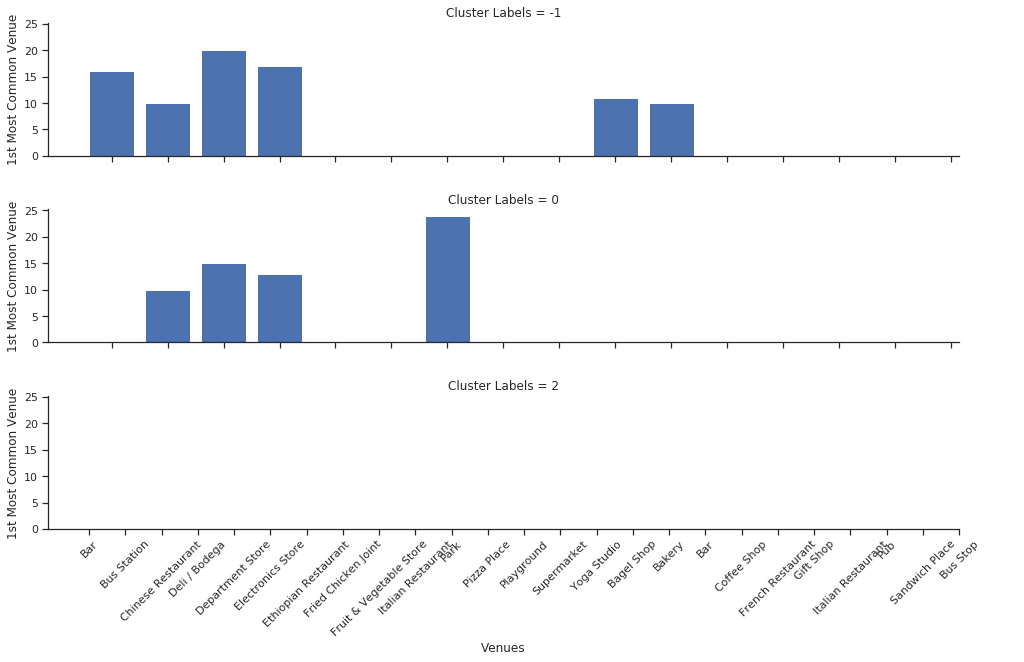

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
loc=range(len(venues))

sns.set(style="ticks")
fig=plt.gcf()
fig.set_size_inches(15, 8)

g=sns.FacetGrid(nyc_counts_01, row='Cluster Labels')
g.map(plt.bar, 'Venues', '1st Most Common Venue')
g.add_legend()
#g.set_xticklabels(Venues, rotation=45)
#g.set(ylim=ylim, xlim=xlim)
g.fig.set_figwidth(18)
g.fig.set_figheight(8)
plt.xticks(loc, venues, rotation=45)
#g.fig.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


In [68]:
nyc_counts_02=pd.concat([nyc_counts_1st[0:20], nyc_counts_2nd[0:20], nyc_counts_3rd[0:20]], axis=1).reset_index()
nyc_counts_02.rename({'level_0': 'Cluster Labels', 'level_1': 'Venues'}, inplace=True, axis=1)
nyc_counts_02.head(10)

Cluster Labels                Venues  1st Most Common Venue  \
0              -1                   Bar                   16.0   
1              -1           Bus Station                   10.0   
2              -1    Chinese Restaurant                   20.0   
3              -1           Coffee Shop                    NaN   
4              -1         Deli / Bodega                   17.0   
5              -1      Department Store                    NaN   
6              -1            Donut Shop                    9.0   
7              -1     Electronics Store                    NaN   
8              -1  Ethiopian Restaurant                    NaN   
9              -1           Event Space                    NaN   

   2nd Most Common Venue  3rd Most Common Venue  
0                    NaN                    NaN  
1                    NaN                    NaN  
2                    7.0                    NaN  
3                    NaN                    7.0  
4                    9.0                   25.0  
5                   11.0                    NaN  
6                    NaN                    NaN  
7                    NaN                   12.0  
8                    NaN                   34.0  
9                    NaN                    9.0

In [ ]:
#nyc_counts_02.to_csv('nyc_counts_02.csv')

In [133]:
nyc_counts_02.fillna(0, inplace=True)
nyc_counts_02['Top3venues']=nyc_counts_02[['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue']].sum(axis=1)
venues2=nyc_counts_02['Venues']
Venues[0:10]

0                        Bar
1                Bus Station
2         Chinese Restaurant
3              Deli / Bodega
4           Department Store
5          Electronics Store
6       Ethiopian Restaurant
7        Fried Chicken Joint
8    Fruit & Vegetable Store
9         Italian Restaurant
Name: Venues, dtype: object

In [134]:
nyc_counts_02.head(2)

Cluster Labels       Venues  1st Most Common Venue  2nd Most Common Venue  \
0              -1          Bar                   16.0                    0.0   
1              -1  Bus Station                   10.0                    0.0   

   3rd Most Common Venue  Top3venues  
0                    0.0        16.0  
1                    0.0        10.0

<Figure size 432x288 with 0 Axes>

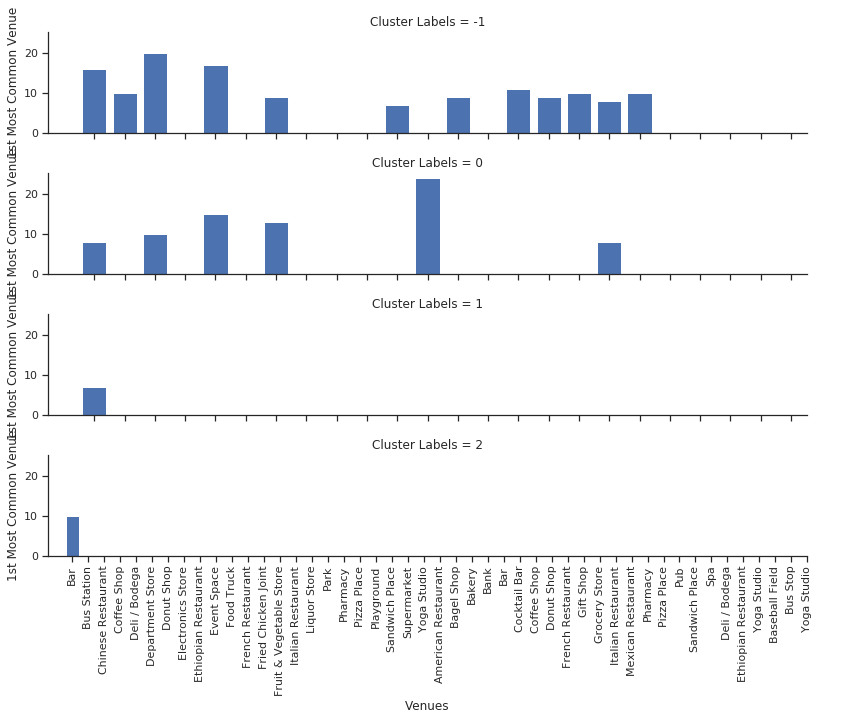

In [120]:
import seaborn as sns
sns.set(style="ticks")
fig=plt.gcf()
#fig.set_size_inches(10, 8)
#f, ax = plt.subplots(figsize=(6, 15))
loc=range(len(venues2))

g=sns.FacetGrid(nyc_counts_02, row='Cluster Labels')
g.map(plt.bar, 'Venues', '1st Most Common Venue')
g.add_legend()
#g.set_xticklabels(rotation=45)
#g.set(ylim=ylim, xlim=xlim)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)

#g.set_xticklabels()
plt.xticks(loc, venues2, rotation=90)
#g.fig.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()

<Figure size 432x288 with 0 Axes>

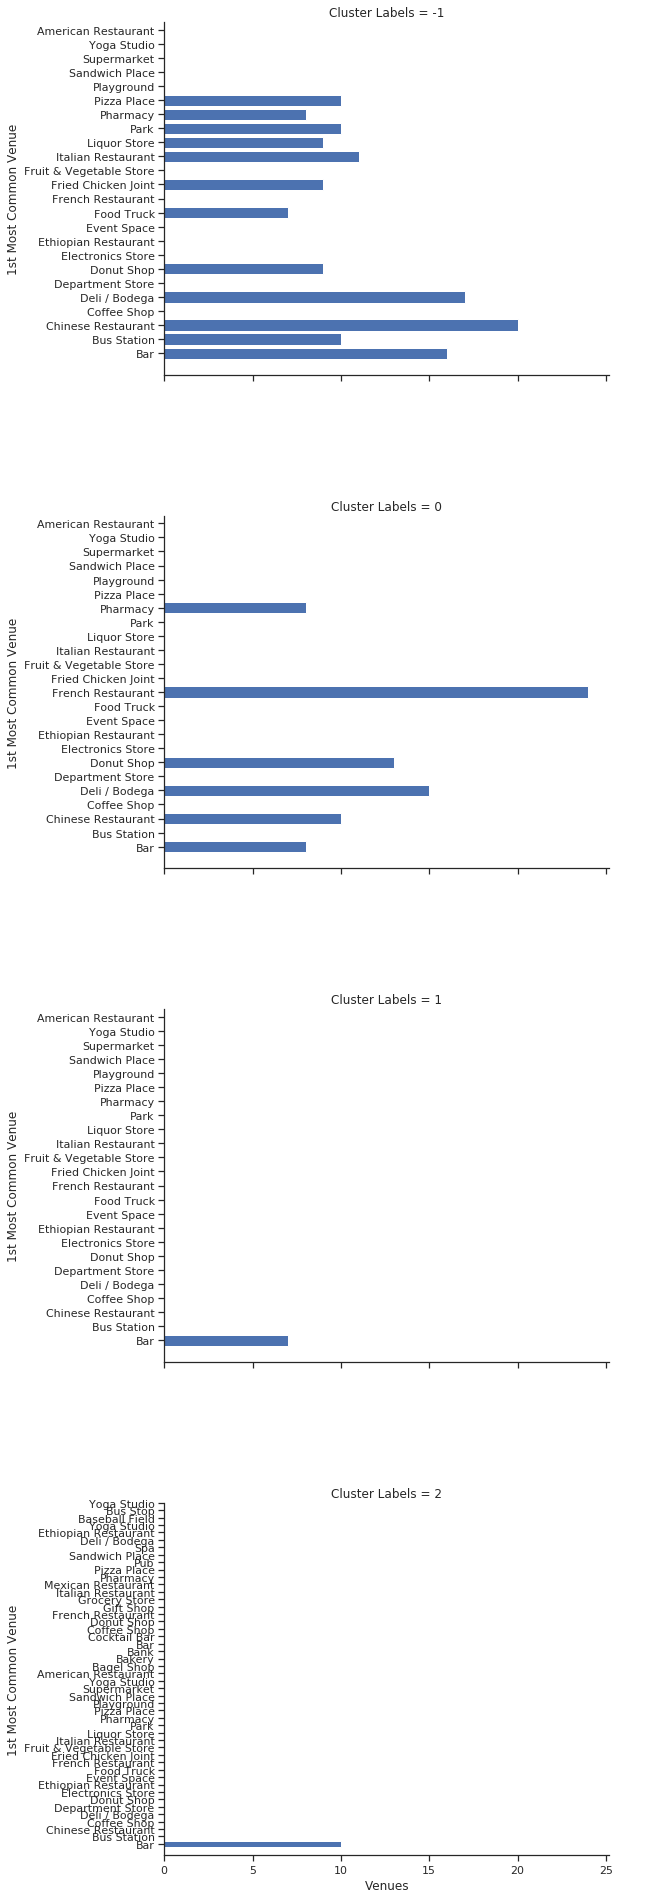

In [123]:
import seaborn as sns
sns.set(style="ticks")
fig=plt.gcf()
#fig.set_size_inches(10, 8)
#f, ax = plt.subplots(figsize=(6, 15))
loc=range(len(venues2))

g=sns.FacetGrid(nyc_counts_02, row='Cluster Labels')
g.map(plt.barh, 'Venues', '1st Most Common Venue')
g.add_legend()
#g.set_xticklabels(rotation=45)
#g.set(ylim=ylim, xlim=xlim)
g.fig.set_figwidth(15)
g.fig.set_figheight(28)

#g.set_xticklabels()
plt.yticks(loc, venues2, rotation=0)
#g.fig.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()

<Figure size 432x288 with 0 Axes>

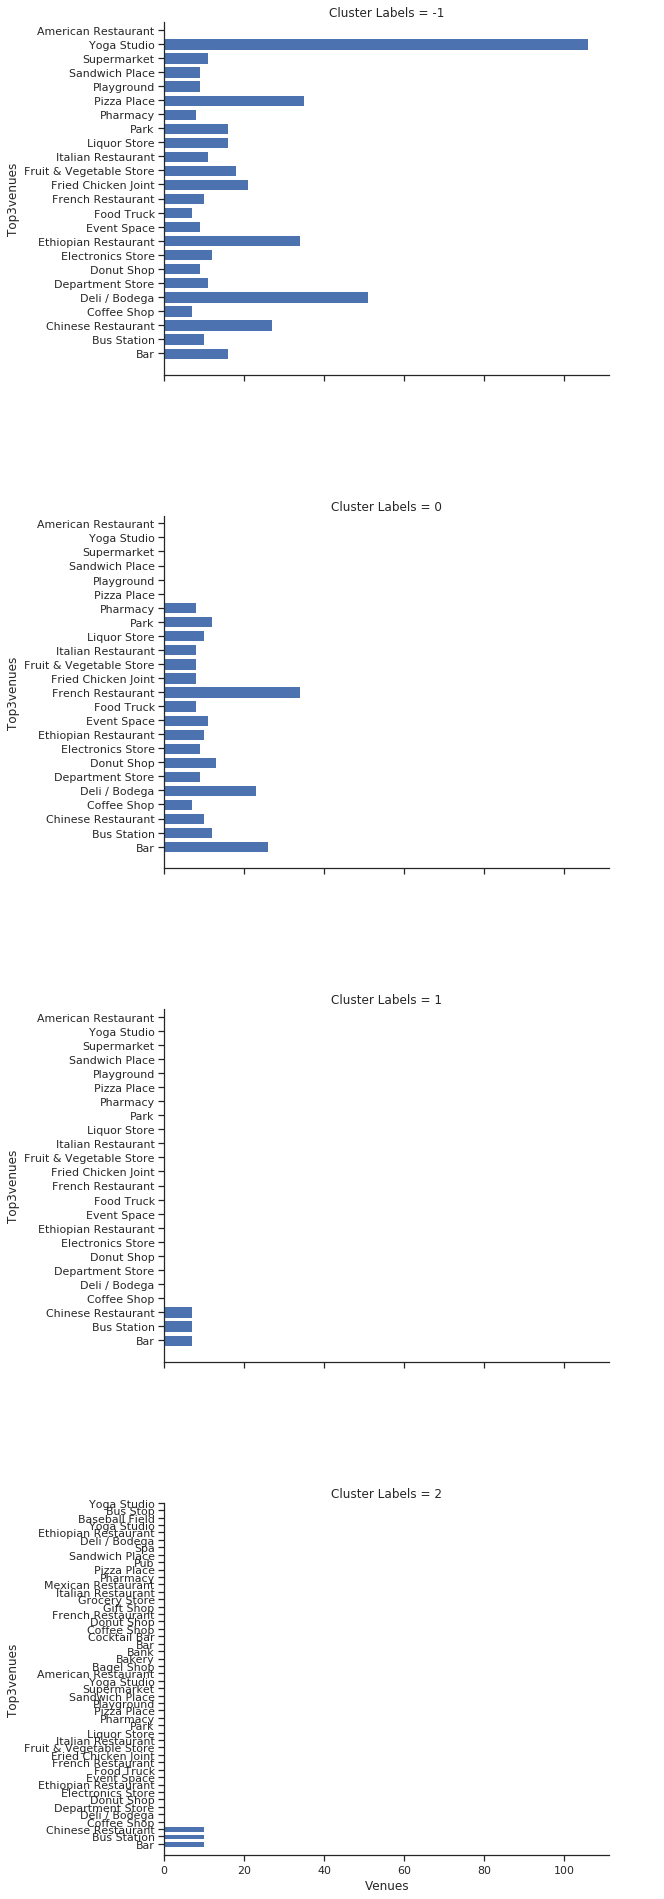

In [135]:
import seaborn as sns
sns.set(style="ticks")
fig=plt.gcf()
#fig.set_size_inches(10, 8)
#f, ax = plt.subplots(figsize=(6, 15))
loc=range(len(venues2))

g=sns.FacetGrid(nyc_counts_02, row='Cluster Labels')
g.map(plt.barh, 'Venues', 'Top3venues')
g.add_legend()
#g.set_xticklabels(rotation=45)
#g.set(ylim=ylim, xlim=xlim)
g.fig.set_figwidth(15)
g.fig.set_figheight(28)

#g.set_xticklabels()
plt.yticks(loc, venues2, rotation=0)
#g.fig.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()

The above plot shows the top venues for each cluster and thus will be used for naming each cluster based on top venues.

### Add another column with the top 3 most common venues info.

In [ ]:
#nyc_merged.to_csv('nyc_merged_cluster#.csv')

In [ ]:
nyc_merged.columns[0]
type(nyc_merged.columns[10])

In [ ]:
nyc_merged=nyc_merged.assign(Top_Common_Venues=nyc_merged['1st Most Common Venue'] + ',' + \
                              nyc_merged['2nd Most Common Venue'] + ','+ \
                              nyc_merged['3rd Most Common Venue'])
nyc_merged.head(2)

In [ ]:
#nyc_merged.to_csv('nyc_merged_2#.csv')

In [235]:
nyc_merged=pd.read_csv('nyc_merged_2#.csv')
nyc_merged.drop('Unnamed: 0', axis=1, inplace=True)
nyc_merged.head(2)

Borough Neighborhood  Zip_Code              Location   Latitude  Longitude  \
0   Bronx     BATHGATE     10451  Bronx,BATHGATE,10451  40.819986 -73.918433   
1   Bronx     BATHGATE     10456  Bronx,BATHGATE,10456  40.833955 -73.896685   

   Sale Price Mean  Sale Price Max  Sale Price Min  Price/Unit Mean  \
0        4461000.0       4461000.0       4461000.0        171576.92   
1         400000.0        400000.0        400000.0        400000.00   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0              -1           Pizza Place           Yoga Studio   
1              -1          Liquor Store            Playground   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  Ethiopian Restaurant     French Restaurant            Food Truck   
1         Deli / Bodega           Supermarket            Shoe Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Food Court     Food & Drink Shop           Flower Shop   
1           Bus Station           Yoga Studio  Fast Food Restaurant   

  9th Most Common Venue 10th Most Common Venue  \
0           Flea Market    Filipino Restaurant   
1               Exhibit     Falafel Restaurant   

                              Top_Common_Venues  
0  Pizza Place,Yoga Studio,Ethiopian Restaurant  
1         Liquor Store,Playground,Deli / Bodega

In [151]:
nyc_merged['Cluster Labels'].astype(str)
nyc_merged.dtypes

Borough                    object
Neighborhood               object
Zip_Code                    int64
Location                   object
Latitude                  float64
Longitude                 float64
Sale Price Mean           float64
Sale Price Max            float64
Sale Price Min            float64
Price/Unit Mean           float64
Cluster Labels              int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
Top_Common_Venues          object
dtype: object

In [236]:
cluster_dict={-1 : 'Social, Shopping & Entertainment Complex', 0: 'French Restaurant, Bar & Misc', 1: 'Chinese Restaurant & Bar_1', 2: 'Chinese Restaurant & Bar_2'}
cluster_dict.get(-1)

'Social, Shopping & Entertainment Complex'

In [237]:
type(nyc_merged['Cluster Labels'][0:10])
print(cluster_dict.get(nyc_merged['Cluster Labels'][0]))

Social, Shopping & Entertainment Complex


In [238]:
nyc_merged['Cluster Labels']=nyc_merged['Cluster Labels'].apply(lambda x: cluster_dict.get(x))
nyc_merged.head()

Borough Neighborhood  Zip_Code                Location   Latitude  \
0   Bronx     BATHGATE     10451    Bronx,BATHGATE,10451  40.819986   
1   Bronx     BATHGATE     10456    Bronx,BATHGATE,10456  40.833955   
2   Bronx     BATHGATE     10457    Bronx,BATHGATE,10457  40.848111   
3   Bronx     BATHGATE     10458    Bronx,BATHGATE,10458  40.862059   
4   Bronx   BAYCHESTER     10466  Bronx,BAYCHESTER,10466  40.887857   

   Longitude  Sale Price Mean  Sale Price Max  Sale Price Min  \
0 -73.918433     4.461000e+06       4461000.0       4461000.0   
1 -73.896685     4.000000e+05        400000.0        400000.0   
2 -73.903813     6.871700e+05       3000000.0         40000.0   
3 -73.887575     9.413929e+05       4052000.0         18000.0   
4 -73.827943     4.748387e+05       3000000.0            10.0   

   Price/Unit Mean                            Cluster Labels  \
0    171576.920000  Social, Shopping & Entertainment Complex   
1    400000.000000  Social, Shopping & Entertainment Complex   
2    465802.968125  Social, Shopping & Entertainment Complex   
3    229476.034167  Social, Shopping & Entertainment Complex   
4    328506.865736  Social, Shopping & Entertainment Complex   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0           Pizza Place           Yoga Studio  Ethiopian Restaurant   
1          Liquor Store            Playground         Deli / Bodega   
2         Deli / Bodega         Grocery Store        Sandwich Place   
3           Coffee Shop               Theater        Sandwich Place   
4                 Diner      Business Service           Yoga Studio   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0     French Restaurant            Food Truck            Food Court   
1           Supermarket            Shoe Store           Bus Station   
2           Yoga Studio  Ethiopian Restaurant            Food Truck   
3                  Café           Yoga Studio        Farmers Market   
4           Event Space     French Restaurant            Food Truck   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0     Food & Drink Shop           Flower Shop           Flea Market   
1           Yoga Studio  Fast Food Restaurant               Exhibit   
2            Food Court     Food & Drink Shop           Flower Shop   
3               Exhibit    Falafel Restaurant  Fast Food Restaurant   
4            Food Court     Food & Drink Shop           Flower Shop   

  10th Most Common Venue                             Top_Common_Venues  
0    Filipino Restaurant  Pizza Place,Yoga Studio,Ethiopian Restaurant  
1     Falafel Restaurant         Liquor Store,Playground,Deli / Bodega  
2            Flea Market    Deli / Bodega,Grocery Store,Sandwich Place  
3   Ethiopian Restaurant            Coffee Shop,Theater,Sandwich Place  
4            Flea Market            Diner,Business Service,Yoga Studio

In [239]:
#nyc_merged.to_csv('nyc_merged_2_name.csv')

### Finally, let's visualize the data.

In [ ]:
#nyc_merged=pd.read_csv('nyc_merged_2.csv')

In [240]:
nyc_merged=pd.read_csv('nyc_merged_2_name.csv')
nyc_merged.drop('Unnamed: 0', axis=1, inplace=True)
nyc_merged.head(2)

Borough Neighborhood  Zip_Code              Location   Latitude  Longitude  \
0   Bronx     BATHGATE     10451  Bronx,BATHGATE,10451  40.819986 -73.918433   
1   Bronx     BATHGATE     10456  Bronx,BATHGATE,10456  40.833955 -73.896685   

   Sale Price Mean  Sale Price Max  Sale Price Min  Price/Unit Mean  \
0        4461000.0       4461000.0       4461000.0        171576.92   
1         400000.0        400000.0        400000.0        400000.00   

                             Cluster Labels 1st Most Common Venue  \
0  Social, Shopping & Entertainment Complex           Pizza Place   
1  Social, Shopping & Entertainment Complex          Liquor Store   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Yoga Studio  Ethiopian Restaurant     French Restaurant   
1            Playground         Deli / Bodega           Supermarket   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0            Food Truck            Food Court     Food & Drink Shop   
1            Shoe Store           Bus Station           Yoga Studio   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
0           Flower Shop           Flea Market    Filipino Restaurant   
1  Fast Food Restaurant               Exhibit     Falafel Restaurant   

                              Top_Common_Venues  
0  Pizza Place,Yoga Studio,Ethiopian Restaurant  
1         Liquor Store,Playground,Deli / Bodega

In [228]:
address= 'New York City, USA'

geolocator=Nominatim(user_agent='nyc_explorer')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('The geographical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geographical coordinate of New York City are 40.7127281, -74.0060152.


In [241]:
len(nyc_merged['Cluster Labels'].unique())
cluster_dict1={ 'Social, Shopping & Entertainment Complex' : -1, 'French Restaurant, Bar & Misc': 0, 'Chinese Restaurant & Bar_1': 1, 'Chinese Restaurant & Bar_2': 2}
cluster_dict1.get('Social, Shoppin & Entertainment Complex')

In [242]:
#create map
map_nyc_clusters=folium.Map(location=[latitude, longitude], zoom_start=10)
cluster_dict1={ 'Social, Shopping & Entertainment Complex' : -1, 'French Restaurant, Bar & Misc': 0, 'Chinese Restaurant & Bar_1': 1, 'Chinese Restaurant & Bar_2': 2}

#set color scheme for the clusters
x = np.arange(kclusters)
ys=[i+x+(i*x)**2 for i in range(kclusters)]
colors_array=cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow=[colors.rgb2hex(i) for i in colors_array]
#n=range(len(nyc_merged['Cluster Labels'].unique()))
#add markers to the map
markers_colors = []
for lat, lon, location, cluster, TopVenue, UnitPrice in zip(nyc_merged['Latitude'],
                                                            nyc_merged['Longitude'],
                                                            nyc_merged['Location'],
                                                            nyc_merged['Cluster Labels'],
                                                            nyc_merged['Top_Common_Venues'], 
                                                            nyc_merged['Price/Unit Mean']):
    #cluster.astype(int)
    label = '{}: Cluster: {}, TopVenues: {}; House mean unit price: {:,.2f}'.format(
        location, cluster, TopVenue, UnitPrice)
    label = folium.Popup(label, parse_html=True)
    #label=folium.Popup(str(location) + ' Cluster ' + str(cluster), + \
     #                  'Top Venues:' + str(TopVenue), + \
      #                 'House Mean Price:',parse_html=True)
    folium.CircleMarker(
    [lat, lon],
    radius=5,
    popup=label,
    color=rainbow[cluster_dict1.get(cluster)],
    fill=True,
    fill_color=rainbow[cluster_dict1.get(cluster)],
    fill_opacity=0.7).add_to(map_nyc_clusters)
map_nyc_clusters